# EDA Projekt
by Christian Reimann

### Running imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import missingno as msno

### Loading data from the primary source

In [6]:
pd.options.display.max_columns = None

df = pd.read_csv("data/eda.csv")

### Exploring and cleaning the data

In [7]:
df.head(10)

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0
5,2014-05-12,1230000.0,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,3890.0,1530.0,2001,0.0,98053,47.6561,-122.005,4760.0,101930.0
6,2014-06-27,257500.0,1321400060,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3,7,1715.0,NaN,1995,0.0,98003,47.3097,-122.327,2238.0,6819.0
7,2015-01-15,291850.0,2008000270,3.0,1.50,1060.0,9711.0,1.0,0.0,NaN,3,7,1060.0,0.0,1963,0.0,98198,47.4095,-122.315,1650.0,9711.0
8,2015-04-15,229500.0,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,1050.0,730.0,1960,0.0,98146,47.5123,-122.337,1780.0,8113.0
9,2015-03-12,323000.0,3793500160,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3,7,1890.0,0.0,2003,0.0,98038,47.3684,-122.031,2390.0,7570.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The data types seem good, except for the date. So lets convert it pandas data time and derive some more date columns from it.

In [9]:
df["sold"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df["sold_year"] = df["sold"].dt.year
df["sold_month"] = df["sold"].dt.month
df["sold_weekday"] = df["sold"].dt.dayofweek
df.drop("date", axis=1, inplace=True)
df[["sold", "sold_year", "sold_month", "sold_weekday"]].head(10)

,sold,sold_year,sold_month,sold_weekday
0,2014-10-13,2014,10,0
1,2014-12-09,2014,12,1
2,2015-02-25,2015,2,2
3,2014-12-09,2014,12,1
4,2015-02-18,2015,2,2
5,2014-05-12,2014,5,0
6,2014-06-27,2014,6,4
7,2015-01-15,2015,1,3
8,2015-04-15,2015,4,2
9,2015-03-12,2015,3,3


We also like to have columns setting the price in relation to the living- and lot space:

In [10]:
df["sqft_total"] = df["sqft_living"] + df["sqft_lot"]
df["price_per_sqft_total"] = df["price"] / df["sqft_total"]
df["price_per_sqft_living"] = df["price"] / df["sqft_living"]
df["price_per_sqft_lot"] = df["price"] / df["sqft_lot"]
df[["price", "sqft_living", "sqft_lot", "sqft_total", "price_per_sqft_total", "price_per_sqft_living", "price_per_sqft_lot"]].head(10)

,price,sqft_living,sqft_lot,sqft_total,price_per_sqft_total,price_per_sqft_living,price_per_sqft_lot
0,221900.0,1180.0,5650.0,6830.0,32.489019,188.050847,39.274336
1,538000.0,2570.0,7242.0,9812.0,54.830819,209.338521,74.288870
2,180000.0,770.0,10000.0,10770.0,16.713092,233.766234,18.000000
3,604000.0,1960.0,5000.0,6960.0,86.781609,308.163265,120.800000
4,510000.0,1680.0,8080.0,9760.0,52.254098,303.571429,63.118812
5,1230000.0,5420.0,101930.0,107350.0,11.457848,226.937269,12.067105
6,257500.0,1715.0,6819.0,8534.0,30.173424,150.145773,37.762135
7,291850.0,1060.0,9711.0,10771.0,27.095906,275.330189,30.053548
8,229500.0,1780.0,7470.0,9250.0,24.810811,128.932584,30.722892
9,323000.0,1890.0,6560.0,8450.0,38.224852,170.899471,49.237805


<Axes: >

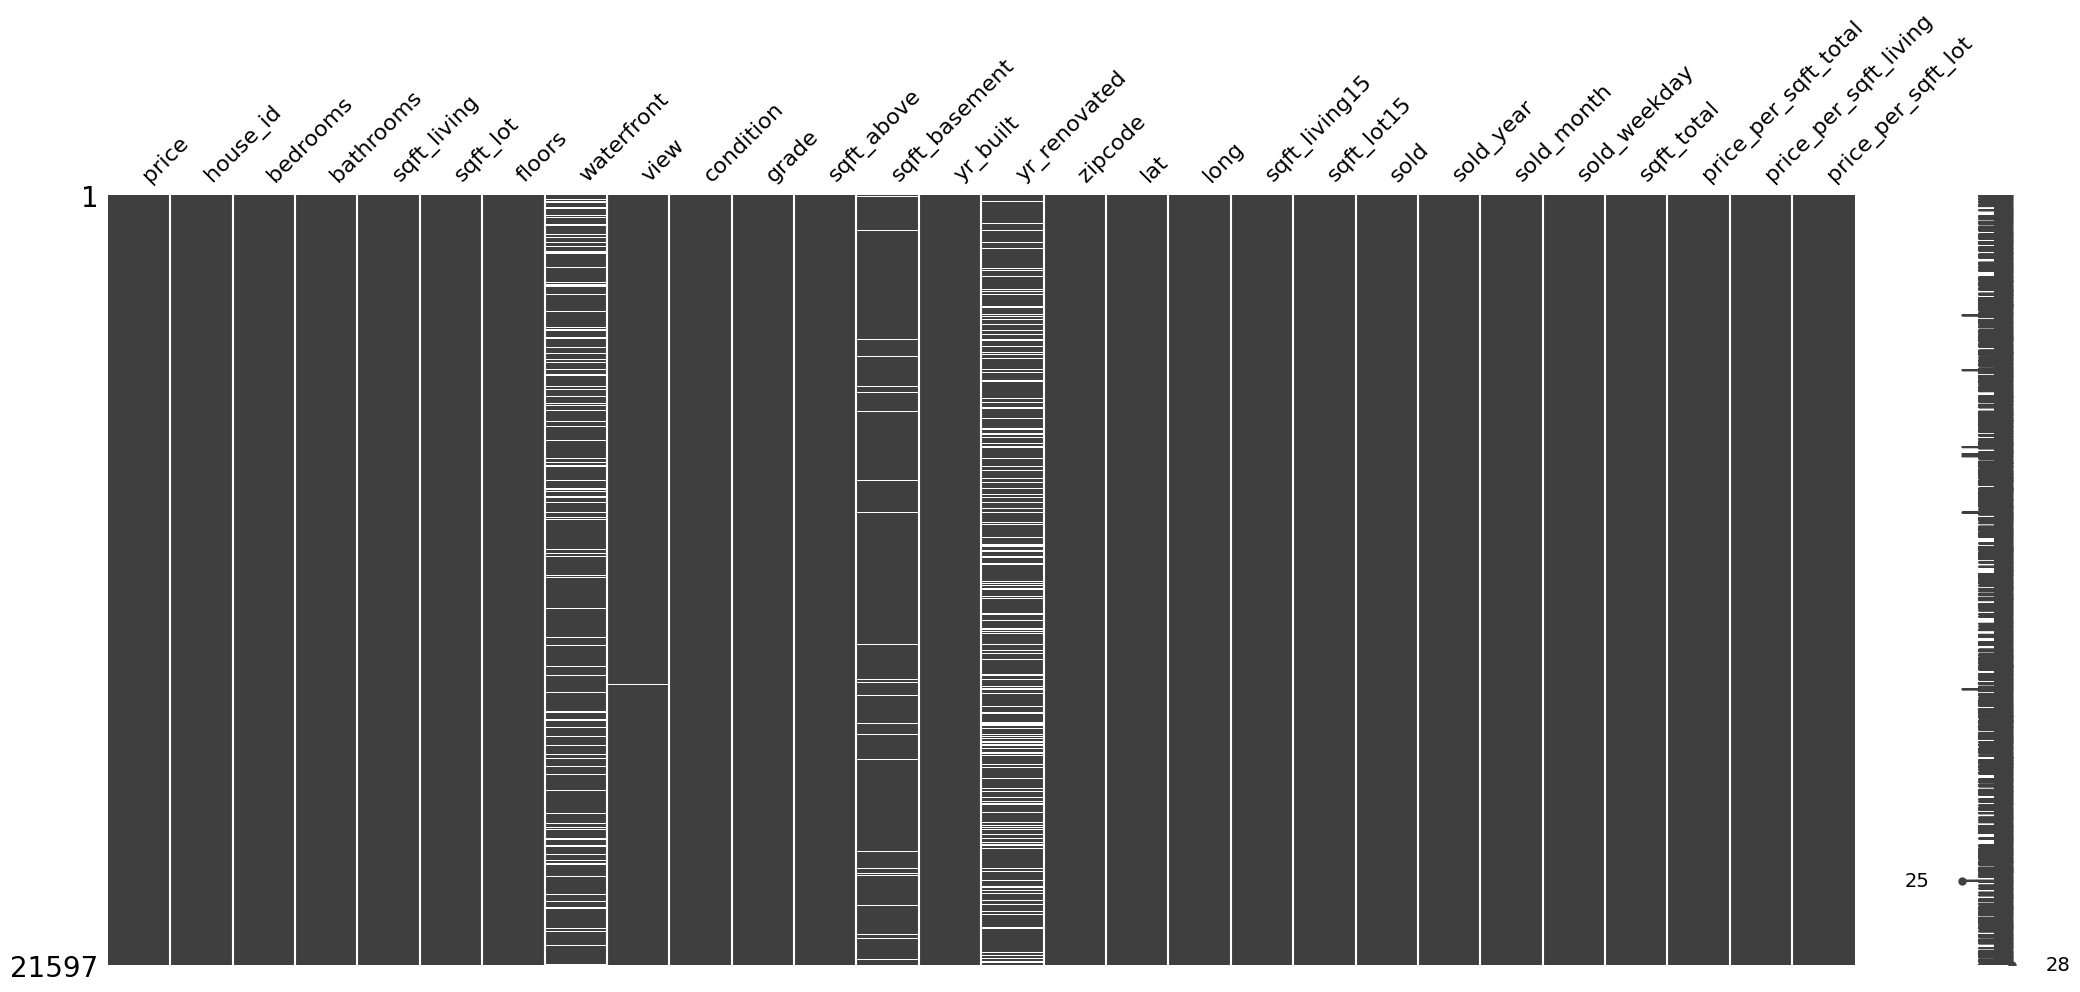

In [11]:
msno.matrix(df)

There are some missing values in the waterfront, yt_renovated and sqft_basement columns. Unfortunately the missing values cannot be imputed, because there are no other features which allow is to infer from.

### Basic considerations

Now, let's have a look at the client. I chose Larry Sanders, who is looking for a house for himself and his **unknown number of kids**. It must reside on the **waterfront**, in a **nice** and **isolated** but also **central** neighborhood **without kids**. Larry has a **limited budget**.

- Since larry has kids, we can assume that his house at least needs three bedrooms, one for himself and at least two for the kids. Further constraints could be a minimum living space.

- Only houses on the waterfront are being considered. Houses explicitly not on the waterfront or without any knowledge of it will be discarded

- The new home has to be central, so this will limit us either to a certain set of zipcodes or to a maximum search radius from the city center.

- Since larry has a limited budget, it is reasonable to find criteria, which have influence on the price. This could be the size of the house and lot, the renovation status, the neighborhood, the grade of the house or the time to buy.

- Larry wants a nice neighborhood. So how do define this? Interesting features/relations might be the avg(grade) or the avg(price) in an area.

- He also wants an isolated area and without kids, so we need a an area which is not family friendly. We might derive this from features like the size of the house, the lot, the number of rooms, 15lot and 15 living.

### Hypothesis

1. Locations at the waterfront are more expensive than those on the landsite.

2. Houses in areas more closer to the city center are more expensive than those farer away.

3. Locations closer to the city center are less family friendly than those farer away.

### Hypothesis 1: Locations at the waterfront are more expensive than those on the landsite.

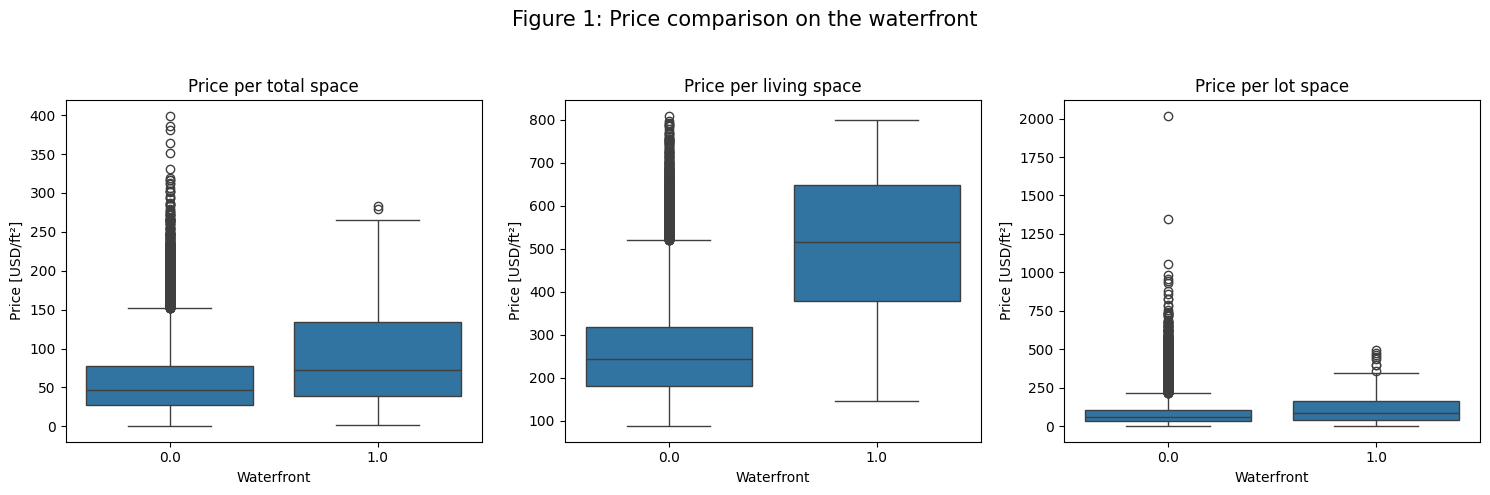

In [12]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))
fig.suptitle("Figure 1: Price comparison on the waterfront", fontsize=15)

f1 = sns.boxplot(x = df["waterfront"], y = df["price_per_sqft_total"], ax=ax[0])
f1.set_xlabel("Waterfront")
f1.set_ylabel("Price [USD/ft²]", fontsize = 10)
f1.set_title("Price per total space", fontsize = 12)

f2 = sns.boxplot(x = df["waterfront"], y = df["price_per_sqft_living"], ax=ax[1])
f2.set_xlabel("Waterfront")
f2.set_ylabel("Price [USD/ft²]", fontsize = 10)
f2.set_title("Price per living space", fontsize = 12)

f3 = sns.boxplot(x = df["waterfront"], y = df["price_per_sqft_lot"], ax=ax[2])
f3.set_xlabel("Waterfront")
f3.set_ylabel("Price [USD/ft²]", fontsize = 10)
f3.set_title("Price per lot space", fontsize = 12)

fig.tight_layout()
plt.subplots_adjust(wspace = .2, top = 0.8)
plt.show()


Figure 1 shows that there is little difference in prices when considering the size of the living space and lot combined. But if we just consider the living space, there is a significant difference in the mean price of about 250 USD per ft² between houses lying on the waterfront and those which don't. This comparison anyway is a little bit fuzzy, because there are about 19000 houses without and only 146 ones with waterfront.

### 2. Houses in areas more closer to the city center are more expensive than those farer away.

To gather this knowledge, we make use of a geographical plot. First, we build the median price of all houses in a certain area - in this case the zipcode is being used for that purpose. When then determine the Q25 and Q75 quantiles. Regions where the median house price is below Q25 are marked green, prices within the IQR are orange and everything higher than Q75 is marked red.

In [13]:
q25 = df["price_per_sqft_living"].quantile(0.25)
q75 = df["price_per_sqft_living"].quantile(0.75)
map_df = df.groupby("zipcode").agg(lat=("lat", "mean"), long=("long", "mean"), price=("price_per_sqft_living", "median"))

m = folium.Map(location=[map_df['lat'].mean(), map_df['long'].mean()], zoom_start=8)

folium.Marker(
    location=[47.620422, -122.349358], icon=folium.Icon(color="black")
).add_to(m)

for _, row in map_df.iterrows():
    text = "Price: " + str(round(row["price"])) + " USD/m²"
    if row["price"] < q25:
        color = "green"
    elif row["price"] < q75:
        color = "orange"
    else:
        color = "red"

    folium.Marker(
        location=[row['lat'], row['long']], 
        icon=folium.Icon(color=color), tooltip=text).add_to(m)

m


From the map markers we can infer, that houses closer to the city center are way more expensive than the ones in the greater area.

<Axes: xlabel='grade', ylabel='price_per_sqft_living'>

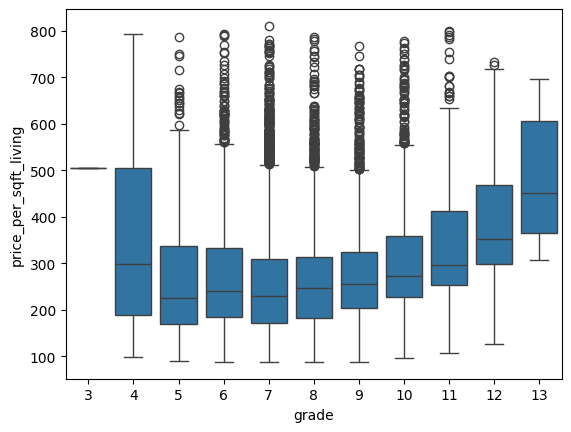

In [16]:
#print(df.head(10))
df[["", "", ""]].corr("pearson")
#sns.scatterplot(y=df["price_per_sqft_living"],x =df["grade"])
sns.boxplot(x=df["grade"], y=df["price_per_sqft_living"])
#df.groupby("grade")["price_per_sqft_living"].mean().plot(kind="bar")
#df.groupby("grade")["price_per_sqft_living"].median().plot(kind="bar")

# rooms, sqft_lot, sqft_living, bedrppm, bathrooms, floors


- FInding outliers (box plot for every interesting varible) and remove them
- correlations
